[[0.38554255947168, 0.11215771753303622, 0.11207987077438063, 0.39021985222090316], [0.38689571977481907, 0.1115628630149227, 0.11236708068984005, 0.3891743365204182], [0.38807664063021563, 0.11151167189621025, 0.11440461089970402, 0.38600707657387007], [0.3886646495928059, 0.11327575818437437, 0.11330815230419375, 0.384751439918626]]
[[0.4417078767898122, 0.0757749119234623, 0.11052716635961085, 0.3719900449271146], [0.38763318621550535, 0.1665552137666622, 0.06834291828273371, 0.37746868173509873], [0.40685306525446546, 0.16746701373305808, 0.16495377434700656, 0.2607261466654699], [0.3302158646919093, 0.1183102065187762, 0.11085943483170861, 0.4406144939576059]]


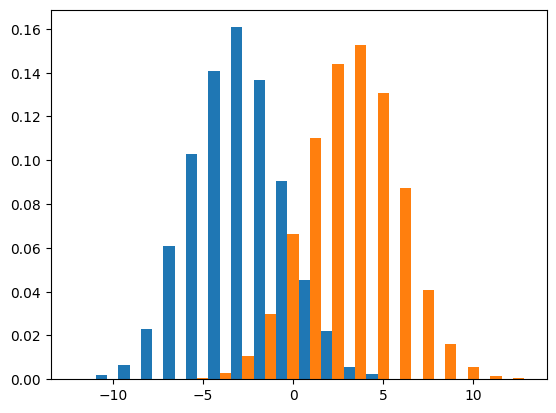

In [30]:
#student version

import math
import matplotlib.pyplot as plt  #if you don't have matplotolib installed (this line gives you an error)
                                 #you can comment out the line that starts with plt. and plot a histogram with the data output

baseIDx = {"A":0,"C":1, "G":2,"T":3}

def main():

    spaciiFA = "MSpacii.fa"
    pathogenFA = "Pathogen.fa"
    spaciiFA_T = "MSpacii_training.fa"
    pathogenFA_T = "Pathogen_training.fa"    
    
    spaciiID2seq = getSeq(spaciiFA)
    pathogenID2seq = getSeq(pathogenFA)
    
    spaciiTrainModel = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]
    pathTrainModel = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]

    seq = {'A':0,'C':1,'G':2,'T':3}
    
    spaciiTrainModel = trainModel(spaciiTrainModel, spaciiFA_T)
    pathTrainModel = trainModel(pathTrainModel, pathogenFA_T)
    
    markovScoresSpacii = []
    markovScoresPath = []

    for ID in spaciiID2seq.keys():
         markovScoresSpacii.append(getLogLike(spaciiTrainModel,pathTrainModel,spaciiID2seq[ID]))
    for ID in pathogenID2seq.keys():
         markovScoresPath.append(getLogLike(spaciiTrainModel,pathTrainModel,pathogenID2seq[ID]))
    
    ####----------------------output-------------------------    
    plt.hist([markovScoresPath, markovScoresSpacii],bins=20,label=['pathogen','spacii'],rwidth=1,density=True)
    scoresOutputText(markovScoresSpacii,markovScoresPath)
    ####----------------------output-------------------------

def scoresOutputText(markovScoresSpacii,markovScoresPath):
    f = open("results.tab", "w")
    f.write("SpaciiScores\tpathogenScores\n")
    for i in range (len(markovScoresSpacii)):
        f.write(str(markovScoresSpacii[i])+"\t"+str(markovScoresPath[i])+"\n")
    f.close()
    
def getLogLike(model1, model2,seq_e): #takes in the two trained models and the sequence that needs to be scored

    m1=0
    m2=0

    score = 0

    i=1
    while i < len(seq_e):
      m1 += math.log(model1[seq[seq_e[i-1]]][seq[seq_e[i]]])
      m2 += math.log(model2[seq[seq_e[i-1]]][seq[seq_e[i]]])
      i+=1
    
    #Please complete this function. This should return the log-likelihood of the two models
    #with Pmod1 and Pmod2 as the probabilities of the two models.
    
    score = m1-m2 #space-pathogen

    return score
    
def trainModel(model, data):

    #Please complete this function. This should look at all the training data and calculate how many
    #dinucleotides preceed each base similar to what was outlined on the slides
    #The ouput of the function should be a 4 x 4 matrix model where each row represents the probability
    #of seing base x given the previous base was y. (each row should sum to 1)
        
    d = getSeq(data)

    for k in d.values():
      for i in range(1,len(k)):
        model[seq[k[i-1]]][seq[k[i]]]+=1


    for i in range(len(model)):
      s = sum(model[i])
      for k in range(len(model)):
        model[i][k] = model[i][k]/s
    
    print(model)
    return model  
    

def getSeq(filename):
    f = open(filename)
    id2seq = {}
    currkey = ""
    for line in f:
        if line.find(">") == 0:
            currkey = line.rstrip()[1:]
            id2seq[currkey] = ""
        else:            
            id2seq[currkey] = id2seq[currkey] + line.rstrip()
    return id2seq
main()